In [1]:
import numpy as npy 
import pandas as pds
import matplotlib.pyplot as mplt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pds.read_csv("Group_8_data_cleaned.csv")

In [3]:
data.head()

,Unnamed: 0,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure
0,0,298.1,308.6,1551,42.8,0,0,0,1,0
1,1,298.2,308.7,1408,46.3,3,0,1,0,0
2,2,298.1,308.5,1498,49.4,5,0,1,0,0
3,3,298.2,308.6,1433,39.5,7,0,1,0,0
4,4,298.2,308.7,1408,40.0,9,0,1,0,0


In [4]:
data = data.drop("Unnamed: 0",axis=1)

In [5]:
X = data.drop(['failure'],axis=1)

y = data["failure"]

colmn = X.columns
colmn

scaler = MinMaxScaler()

for column in colmn:
    scaler.fit(X[[column]])
    X[column] = scaler.transform(X[[column]])
X

,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.0,1.0
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,1.0,0.0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,1.0,0.0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,1.0,0.0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336,0.0,0.0,1.0
9996,0.391304,0.333333,0.270081,0.384615,0.067194,1.0,0.0,0.0
9997,0.402174,0.358025,0.277648,0.406593,0.086957,0.0,0.0,1.0
9998,0.402174,0.370370,0.139697,0.614011,0.098814,1.0,0.0,0.0


## Lets Perform princple Component Analysis

In [6]:
from sklearn.decomposition import PCA


In [7]:
pca = PCA()    
pca.fit(X)
X

,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.0,1.0
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,1.0,0.0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,1.0,0.0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,1.0,0.0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336,0.0,0.0,1.0
9996,0.391304,0.333333,0.270081,0.384615,0.067194,1.0,0.0,0.0
9997,0.402174,0.358025,0.277648,0.406593,0.086957,0.0,0.0,1.0
9998,0.402174,0.370370,0.139697,0.614011,0.098814,1.0,0.0,0.0


In [8]:
pr_variable = npy.round(pca.explained_variance_ratio_*100, 2)
pr_variable

array([57.05, 18.62, 10.64,  8.86,  3.91,  0.68,  0.24,  0.  ])

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']


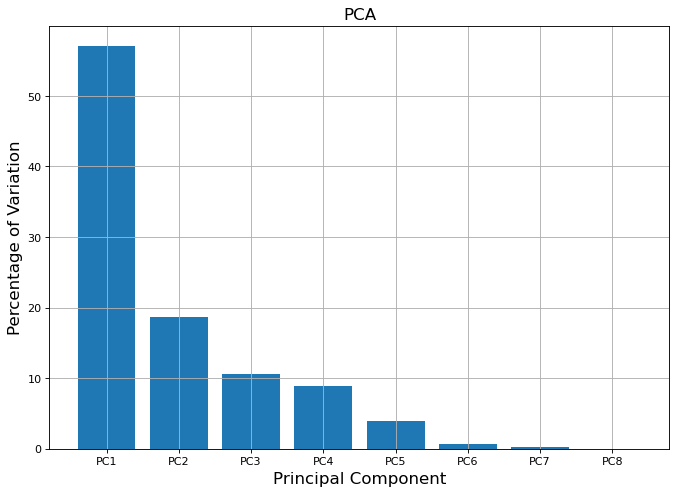

In [29]:
principle_component = ['PC' + str(x) for x in range(1, 9)]

print(principle_component)

mplt.figure(figsize=(10, 7), dpi=80)
mplt.bar(x = range(1,9), height = pr_variable, tick_label = principle_component)
mplt.xlabel('Principal Component', fontsize = 15)
mplt.ylabel('Percentage of Variation', fontsize = 15)
mplt.title('PCA', fontsize = 15)
mplt.grid();

In [10]:
column_list = X.columns
pds.DataFrame(data = pca.components_, columns = principle_component, index = column_list)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
air_temp,-3.741444e-04,-3.701677e-04,-8.076940e-04,4.772033e-05,-3.794601e-03,0.077976,-0.742858,0.664881
process_temp,-3.079605e-02,-2.292909e-02,-1.115046e-04,-2.015207e-03,-2.457952e-03,0.812159,-0.338579,-0.473580
rot_speed,-7.692590e-01,-6.329253e-01,-1.203056e-02,1.235575e-02,-7.664029e-02,-0.031271,0.013622,0.017649
torque,-5.922010e-02,-4.874545e-02,-5.245490e-04,-1.305224e-03,9.970460e-01,-0.000109,-0.002613,0.002723
tool_wear,-1.261133e-02,-1.127065e-02,5.914867e-01,-8.061315e-01,-2.047165e-03,-0.001759,0.000378,0.001380
Type_H,-6.352340e-01,7.722084e-01,-1.004385e-02,-8.222964e-03,5.966383e-06,-0.001521,0.000606,0.000916
Type_L,-1.018428e-02,8.409617e-03,8.061618e-01,5.915454e-01,1.002982e-03,0.000995,-0.000860,-0.000136
Type_M,2.273332e-16,1.972754e-17,3.355385e-16,1.518110e-16,-3.467457e-18,0.577350,0.577350,0.577350


In [11]:
princpleComponentAnalysis_data = pca.transform(X)

princpleComponentAnalysis_df = pds.DataFrame(princpleComponentAnalysis_data, columns = principle_component)

princpleComponentAnalysis_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.905267,-0.198635,0.309526,-0.401271,-0.020585,-0.002429,0.029137,9.883654e-17
1,-0.502456,-0.064368,0.290010,-0.396049,-0.109877,0.000330,-0.010245,-1.189143e-16
2,-0.502513,-0.063579,0.313289,-0.386403,-0.112819,-0.012709,0.057088,-9.115868e-17
3,-0.502528,-0.063938,0.295283,-0.379569,-0.025865,-0.008582,-0.053856,-1.189143e-16
4,-0.502550,-0.064252,0.287123,-0.372291,-0.040164,0.001042,-0.061412,-1.189143e-16
...,...,...,...,...,...,...,...,...
9995,0.905004,-0.200183,0.259753,-0.349179,0.144142,-0.068636,-0.054991,9.883654e-17
9996,0.318038,1.085126,0.201758,-0.340882,0.125013,-0.078402,-0.022131,-2.299366e-16
9997,0.904850,-0.201607,0.225354,-0.320225,0.114455,-0.064059,-0.004044,9.883654e-17
9998,0.318017,1.083417,0.171934,-0.312035,-0.137650,-0.057283,0.008688,-2.299366e-16


In [12]:
#Let us build a 2d visualization using the PCA top 2 features 
princpleComponentAnalysis_df = princpleComponentAnalysis_df.loc[:, ['PC1', 'PC2']]

print(princpleComponentAnalysis_df)

           PC1       PC2
0     0.905267 -0.198635
1    -0.502456 -0.064368
2    -0.502513 -0.063579
3    -0.502528 -0.063938
4    -0.502550 -0.064252
...        ...       ...
9995  0.905004 -0.200183
9996  0.318038  1.085126
9997  0.904850 -0.201607
9998  0.318017  1.083417
9999  0.904798 -0.202147

[10000 rows x 2 columns]


In [13]:
# Lets add the target data to get a visualization on the information and lets see if there are good clusters

projected_data = pds.concat([princpleComponentAnalysis_df, y], axis = 1)
convert_dict = { 'PC1' : float,
                 'PC2' : float,
    'failure': int }  
  
projected_data = projected_data.astype(convert_dict)  
projected_data

,PC1,PC2,failure
0,0.905267,-0.198635,0
1,-0.502456,-0.064368,0
2,-0.502513,-0.063579,0
3,-0.502528,-0.063938,0
4,-0.502550,-0.064252,0
...,...,...,...
9995,0.905004,-0.200183,0
9996,0.318038,1.085126,0
9997,0.904850,-0.201607,0
9998,0.318017,1.083417,0


## This a visualization of the clusters

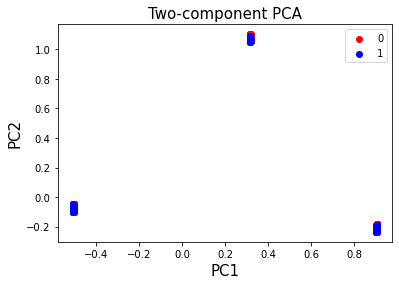

In [14]:
labels = projected_data['failure'].unique()
colors = ["r", "b", "g","yellow",'black']

for label, color in zip(labels, colors):
    index = projected_data["failure"]==label
    mplt.scatter(projected_data.loc[index, "PC1"],
                projected_data.loc[index, "PC2"],
                c = color)
    
mplt.xlabel("PC1", fontsize = 15)
mplt.ylabel("PC2", fontsize = 15)
mplt.title("Two-component PCA", fontsize = 15)
mplt.legend(labels);

Text(0, 0.5, 'Second component')

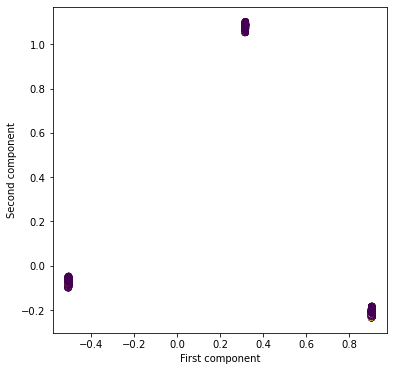

In [15]:
mplt.figure(figsize=(6,6))
mplt.scatter(princpleComponentAnalysis_data[:,0],princpleComponentAnalysis_data[:,1],c=y)
mplt.xlabel('First component')
mplt.ylabel('Second component')

## Lets now perform a non Linear Dimentionality reduction 

In [16]:
from minisom import MiniSom

In [17]:
som = MiniSom( x = 10, y = 10, input_len = 8, sigma = 1.0, learning_rate = 0.5, neighborhood_function='gaussian', random_seed=0)

In [18]:
scaled_data = X.to_numpy()
scaled_data
som.random_weights_init(scaled_data)

In [19]:
som.train_random(data = scaled_data, num_iteration = 100)

In [20]:
scaled_y = y.to_numpy()
scaled_y = list(map(int, scaled_y))

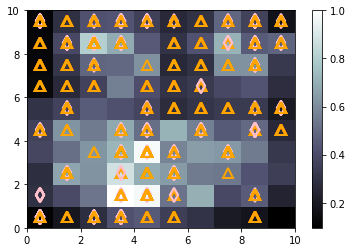

In [21]:
# making a self organization map 
from pylab import bone, pcolor, colorbar, plot, show 
bone() 
pcolor(som.distance_map().T) 
colorbar() 
markers = ["d", "v", "s", "*", "^"] 
colors = ['pink', 'green', 'cyan', 'yellow', 'orange'] 
for i, x in enumerate(scaled_data):
    W = som.winner(x) 
    plot(W[0] + 0.5,
    W[1] + 0.5, markers[scaled_y[i]-1], markeredgecolor = colors [scaled_y[i]-1], markerfacecolor = 'None', markersize = 10,
    markeredgewidth = 2) 
show()

In [22]:
pip install GEMA

Note: you may need to restart the kernel to use updated packages.


In [23]:
import GEMA

# setting parameters
map_size = 8
period = 10000 
learning_rate = 0.1
normalize_data = 'none'

In [24]:
x=X[[ 'air_temp', 'torque', 'Type_M']]
x=x.to_numpy()
x

array([[0.30434783, 0.53571429, 1.        ],
       [0.31521739, 0.58379121, 0.        ],
       [0.30434783, 0.62637363, 0.        ],
       ...,
       [0.40217391, 0.40659341, 1.        ],
       [0.40217391, 0.61401099, 0.        ],
       [0.40217391, 0.5       , 1.        ]])

In [25]:
main_map = GEMA.Map(x, 
                    map_size, 
                    period, 
                    initial_lr=learning_rate, 
                    initial_neighbourhood = 0,
                    distance = 'euclidean',
                    use_decay= False,
                    normalization = normalize_data,
                    presentation= 'random',
                    weights = 'random')

TRAINING...


  0%|          | 0/10000 [00:00<?, ?it/s]

FINISHED.


In [26]:
main_classification = GEMA.Classification(main_map, x)

  0%|          | 0/10000 [00:00<?, ?it/s]

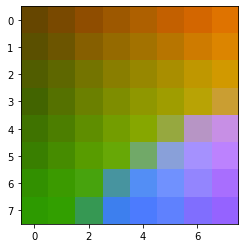

In [27]:
from matplotlib.pyplot import imshow
image_matrix = (main_map.weights-main_map.weights.min())/(main_map.weights.max()-main_map.weights.min())
imshow(image_matrix)